In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/project

/content/drive/MyDrive/project


In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
  inflating: Dataset/TEST_SET/ORANGE/r_98_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_9_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_70_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_89_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_7_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_91_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_93_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_87_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_76_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_77_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_82_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_95_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_96_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_84_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_90_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_80_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_85_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_97_100.jpg  
  inflating: Dataset/TEST_SET/ORANGE/r_6_100

In [ ]:
cd/content/drive/MyDrive/project/Dataset

/content/drive/MyDrive/project/Dataset


In [ ]:
!unzip TRAIN_SET.zip

Archive:  TRAIN_SET.zip
   creating: TRAIN_SET/APPLES/
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/1_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/11_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APPLES/116_100.jpg  
  inflating: TRAIN_SET/APPL

In [ ]:
cd/content/drive/MyDrive/project

/content/drive/MyDrive/project


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/project/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/project/Dataset/TEST_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [ ]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
classifier=Sequential()

In [ ]:
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=5,activation='softmax'))

In [ ]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
    generator=x_train,steps_per_epoch=len(x_train),
    epochs=20,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
526/526 [==============================] - 38s 70ms/step - loss: 0.1578 - accuracy: 0.9414 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 2/20
526/526 [==============================] - 34s 65ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0360 - val_accuracy: 0.9829
Epoch 3/20
526/526 [==============================] - 37s 70ms/step - loss: 2.2226e-04 - accuracy: 1.0000 - val_loss: 0.0574 - val_accuracy: 0.9791
Epoch 4/20
526/526 [==============================] - 35s 67ms/step - loss: 1.0419e-04 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9801
Epoch 5/20
526/526 [==============================] - 37s 71ms/step - loss: 2.9822e-05 - accuracy: 1.0000 - val_loss: 0.0576 - val_accuracy: 0.9791
Epoch 6/20
526/526 [==============================] - 38s 72ms/step - loss: 1.7935e-05 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9791
Epoch 7/20
526/526 [==============================] - 35s 66ms/step - loss: 1.2860e-05 - accuracy: 1.0000 - val_loss: 0.

In [ ]:
classifier.save('nutrition.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


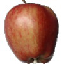

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/project/Dataset/TEST_SET/APPLES/32_100.jpg",target_size=(64,64))
img

In [ ]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.ndim

3

In [ ]:
x=np.expand_dims(x,axis=0)
x.ndim

4

In [ ]:
pred=classifier.predict(x)
pred

1/1 [==============================] - 0s 22ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
lables=['apples','bannana','orange','pineapple','watermelon']
lables[np.argmax(pred)]

'apples'